In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'weight': np.linspace(55,95,100),
    'obesed': np.hstack((np.zeros(50),np.ones(50)))
}

df = pd.DataFrame(data)
df

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
95,93.383838,1.0
96,93.787879,1.0
97,94.191919,1.0
98,94.595960,1.0


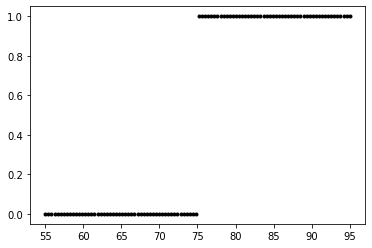

In [3]:
plt.plot(df['weight'],df['obesed'],'k.')

In [4]:
half = int(len(df)/2)
df.iloc[half-1] #berarti thresholdnya sekitar 74.7 keatas

weight    74.79798
obesed     0.00000
Name: 49, dtype: float64

In [5]:
copy = df.copy()
copy2 = df.copy()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(df[['weight']], df['obesed'])
df['pred'] = lr.predict(df[['weight']])

In [8]:
df

,weight,obesed,pred
0,55.000000,0.0,-0.242574
1,55.404040,0.0,-0.227573
2,55.808081,0.0,-0.212571
3,56.212121,0.0,-0.197570
4,56.616162,0.0,-0.182568
...,...,...,...
95,93.383838,1.0,1.182568
96,93.787879,1.0,1.197570
97,94.191919,1.0,1.212571
98,94.595960,1.0,1.227573


In [9]:
print(lr.coef_[0])
print(lr.intercept_)

0.037128712871287134
-2.284653465346535


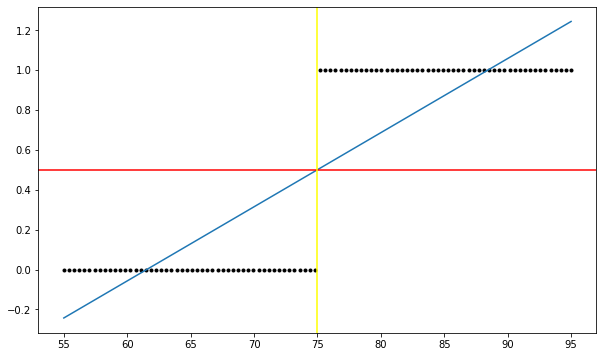

In [10]:
plt.figure(figsize=(10,6))

plt.plot(df['weight'],df['obesed'],'k.')
plt.plot(df['weight'],df['pred'])

plt.axhline(0.5, color='red') #thershold
plt.axvline(x=75, ymin=0, ymax=1, color='yellow') #thershold

plt.show()

In [11]:
df['obesed_pred'] = df['pred'].apply(lambda x: 0 if x<0.5 else 1)
df

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,-0.242574,0
1,55.404040,0.0,-0.227573,0
2,55.808081,0.0,-0.212571,0
3,56.212121,0.0,-0.197570,0
4,56.616162,0.0,-0.182568,0
...,...,...,...,...
95,93.383838,1.0,1.182568,1
96,93.787879,1.0,1.197570,1
97,94.191919,1.0,1.212571,1
98,94.595960,1.0,1.227573,1


In [12]:
print(df.iloc[half])
print('-'*25)
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64
-------------------------
weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [13]:
new_row = pd.DataFrame({'weight':[159,160,154,143], 'obesed': [1,1,1,1]}) #nambahin data 4 rows
copy = pd.concat([copy,new_row], axis=0, ignore_index=True)

In [14]:
copy

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [15]:
copy2 = copy.copy()
copy2

,weight,obesed
0,55.000000,0.0
1,55.404040,0.0
2,55.808081,0.0
3,56.212121,0.0
4,56.616162,0.0
...,...,...
99,95.000000,1.0
100,159.000000,1.0
101,160.000000,1.0
102,154.000000,1.0


In [16]:
lrb = LinearRegression()
lrb.fit(copy[['weight']], copy['obesed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
copy['pred'] = lrb.predict(copy[['weight']])
copy

,weight,obesed,pred
0,55.000000,0.0,0.118695
1,55.404040,0.0,0.125719
2,55.808081,0.0,0.132744
3,56.212121,0.0,0.139768
4,56.616162,0.0,0.146793
...,...,...,...
99,95.000000,1.0,0.814116
100,159.000000,1.0,1.926790
101,160.000000,1.0,1.944175
102,154.000000,1.0,1.839862


In [18]:
#membandingkan Linear Regressi lrb dengan lr

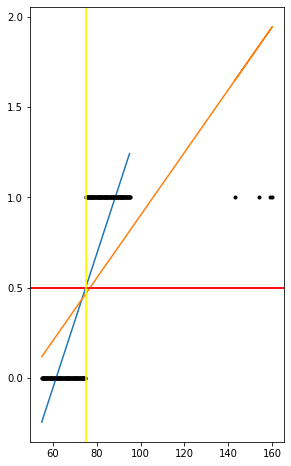

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.plot(df['weight'], df['obesed'], 'k.')
plt.plot(df['weight'], df['pred'])
plt.axhline(0.5, color ='red')
plt.axvline(x=75, ymin=0, ymax=1, color='yellow')

plt.plot(copy['weight'], copy['obesed'], 'k.')
plt.plot(copy['weight'], copy['pred'])
plt.axhline(0.5, color ='red')
plt.axvline(x=75, ymin=0, ymax=1, color='yellow')


In [20]:
copy['obesed_pred'] = copy['pred'].apply(lambda x: 0 if x<0.5 else 1)
copy

,weight,obesed,pred,obesed_pred
0,55.000000,0.0,0.118695,0
1,55.404040,0.0,0.125719,0
2,55.808081,0.0,0.132744,0
3,56.212121,0.0,0.139768,0
4,56.616162,0.0,0.146793,0
...,...,...,...,...
99,95.000000,1.0,0.814116,1
100,159.000000,1.0,1.926790,1
101,160.000000,1.0,1.944175,1
102,154.000000,1.0,1.839862,1


In [21]:
print(df.iloc[half])
print('-'*25)
print(df.iloc[half-1])

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64
-------------------------
weight         74.797980
obesed          0.000000
pred            0.492499
obesed_pred     0.000000
Name: 49, dtype: float64


In [22]:
print(copy.iloc[half])

weight         75.202020
obesed          1.000000
pred            0.469918
obesed_pred     0.000000
Name: 50, dtype: float64


In [23]:
#cari dimana thersholdnya
print(copy.iloc[half+5])
print('-'*25)
print(copy.iloc[half+1])
# awalnya obesed adalah 75,20 menjadi 77,22

weight         77.222222
obesed          1.000000
pred            0.505040
obesed_pred     1.000000
Name: 55, dtype: float64
-------------------------
weight         75.606061
obesed          1.000000
pred            0.476942
obesed_pred     0.000000
Name: 51, dtype: float64


## Logistic Regression
Sigmoid Function

$\displaystyle sig(t) \hat{y} = \frac{1}{1+e^{-(mx+c)}}$

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#pake dataset copy2
logreg = LogisticRegression()
logreg.fit(copy2[['weight']],copy2['obesed'])
print("b/m/slope", logreg.coef_[0])
print("a/c/intercept", logreg.intercept_[0])

b/m/slope [0.05941417]
a/c/intercept -4.263469789533045


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
b = logreg.coef_[0][0]
a = logreg.intercept_[0]
b,a

(0.05941416693581443, -4.263469789533045)

In [28]:
copy2['pred'] = logreg.predict(copy2[['weight']])
copy2

,weight,obesed,pred
0,55.000000,0.0,0.0
1,55.404040,0.0,0.0
2,55.808081,0.0,0.0
3,56.212121,0.0,0.0
4,56.616162,0.0,0.0
...,...,...,...
99,95.000000,1.0,1.0
100,159.000000,1.0,1.0
101,160.000000,1.0,1.0
102,154.000000,1.0,1.0


In [31]:
#sigmoid = menghitung probabilitas 1
copy2['pred'] = logreg.predict(copy2[['weight']])
copy2['proba1'] = 1 / (1+np.exp(-1*(b*copy2['weight'] + a)))
copy2['proba0'] = 1 - copy2['proba1']
copy2

,weight,obesed,pred,proba1,proba0
0,55.000000,0.0,0.0,0.269790,0.730210
1,55.404040,0.0,0.0,0.274545,0.725455
2,55.808081,0.0,0.0,0.279352,0.720648
3,56.212121,0.0,0.0,0.284210,0.715790
4,56.616162,0.0,0.0,0.289119,0.710881
...,...,...,...,...,...
99,95.000000,1.0,1.0,0.799132,0.200868
100,159.000000,1.0,1.0,0.994422,0.005578
101,160.000000,1.0,1.0,0.994742,0.005258
102,154.000000,1.0,1.0,0.992507,0.007493


In [32]:
copy2.iloc[half]

weight    75.202020
obesed     1.000000
pred       1.000000
proba1     0.550971
proba0     0.449029
Name: 50, dtype: float64

In [33]:
df.iloc[half]

weight         75.202020
obesed          1.000000
pred            0.507501
obesed_pred     1.000000
Name: 50, dtype: float64

In [ ]:
# proba 1 =0.05 --> cocok dengan obesed_pred = 1

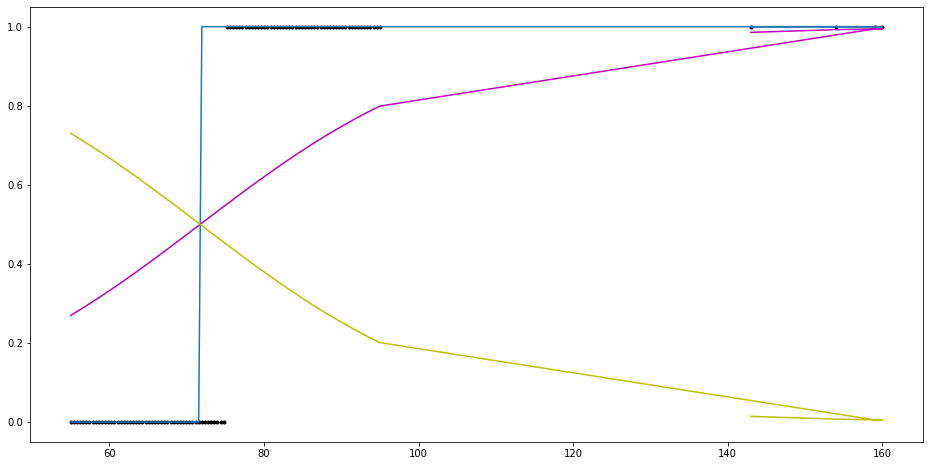

In [34]:
plt.figure(figsize=(16,8))

plt.plot(copy2['weight'], copy2['obesed'], 'k.')
plt.plot(copy2['weight'], copy2['pred'])
plt.plot(copy2['weight'], copy2['proba1'], 'm-')
plt.plot(copy2['weight'], copy2['proba0'], 'y-')